In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import statsmodels.tsa.stattools as st
from numpy.linalg import matrix_power, inv, pinv
from scipy import stats
from scipy.fft import fft, ifft, fftfreq
import pysepm
def db(x):
    return 10*np.log10(np.absolute(x))

#Fernanda Caldas e João Tadeu Fonseca

#Processamento do áudio e adição do ruído
fs, audio = wavfile.read("fala original.WAV")
power = audio**2
power_avg_db = db(np.mean(power))
SNR = 0
noise_db = power_avg_db - SNR
noise_watt = 10**(noise_db/10)
noise = np.random.normal(0, np.sqrt(noise_watt), len(audio))
audio_noise = audio + noise
wavfile.write("fala ruido 0dB.WAV", fs, audio_noise.astype(np.int16))
ruido_power = (audio[:33075] - audio_noise[:33075])**2
ruido_db = 10*np.log10(np.mean(ruido_power))
SNR = power_avg_db - ruido_db
print('SNR inicial = ', SNR, '\n')

#Matriz de Transição
p = 5
print('p = ', p, '\n')
y = audio_noise
Ry = np.zeros((p,p))
ryy = np.zeros((2*p+1,1))
for i in range(2*p+1):            
    aux = np.zeros(y.shape)
    aux[:len(y)-i] = y[i:]
    ryy[i][0] = np.mean(aux*y)
for i in range(p):
    Ry[i,:] = ryy[i+1:i+p+1,0]    
a = np.matmul(np.linalg.inv(Ry),ryy[1+p:,:])
A = np.zeros((p,p))
A[:p-1,1:] = np.identity(p-1)
A[p-1,:] = a[:,0]
w, z = np.linalg.eig(A)
print('Autovalores de A (módulo):', abs(w), '\n')

#Filtro de Kalman iterativo
xnn_1 = np.zeros((p,1))
xn1n = np.zeros((p,1))
e = np.zeros((len(y)))
H = np.zeros((1,p))
H[0][p-1] = 1
K = np.zeros((p,1))
I = np.identity(p)
for k in range(10):
    for n in range(1,len(y)):
        e[n] = y[n] - np.dot(H,xnn_1)
        xnn = xnn_1 + K*e[n]
        xn1n = np.dot(A, xnn)
        xnn_1 = xn1n
    ree = np.zeros((p+1,1))
    for i in range(p+1):    
        aux = np.zeros(e.shape)
        aux[:len(e)- i] = e[i:]
        ree[i][0] = np.mean(aux*e)
    M = np.zeros((p,p))
    for i in range(p):
        M[i,:] = np.dot(H,np.dot(matrix_power(np.dot(A,(I - np.dot(K,H))),i),A))    
    aux = np.zeros((p,1))
    aux[:,0] = ree[1:,0]
    K = K + np.dot(inv(M),aux)/ree[0][0]
print('Autocorrelação de e(n):', '\n', ree, '\n')
print('Ganho de Kalman:', '\n', K, '\n')

#Estimação da Saída
s_hat = np.zeros((len(y)))
xnn_1 = np.zeros((p,1))
for n in range(1,len(y)):
    e[n] = y[n] - np.dot(H,xnn_1)
    xnn = xnn_1 + K*e[n]
    s_hat[n] = np.dot(H,xnn)
    xn1n = np.dot(A, xnn)
    xnn_1 = xn1n
wavfile.write("fala 2_6dB.WAV", fs, s_hat.astype(np.int16))
k =  s_hat[:33075] - audio[:33075]
ruido_power = (k)**2
ruido_db = 10*np.log10(np.mean(ruido_power))
SNR = power_avg_db - ruido_db
print('SNR final = ', SNR)

SNR inicial =  -0.03315327575941751 

p =  5 

Autovalores de A (módulo): [0.71889274 0.87703506 0.87703506 0.89801284 0.89801284] 

Autocorrelação de e(n): 
 [[ 5.94059181e+05]
 [ 8.41781767e-04]
 [-1.31376613e-02]
 [-5.75582059e-03]
 [ 1.23048165e-02]
 [ 1.10365163e-02]] 

Ganho de Kalman: 
 [[-1.27047702]
 [ 0.08044067]
 [-0.46355649]
 [ 0.70499584]
 [ 0.34346865]] 

SNR final =  2.6524889056010075


## Diferentes SNR

SNR inicial =  -15.029986041242108
SNR final =  -11.66172269002298 

SNR inicial =  -14.04717223095621
SNR final =  -10.816082667889741 

SNR inicial =  -13.034409132924882
SNR final =  -9.875434763581804 

SNR inicial =  -12.001368423937176
SNR final =  -8.913173065296679 

SNR inicial =  -10.961314172422792
SNR final =  -7.87733941343097 

SNR inicial =  -10.021419926829555
SNR final =  -7.010473417878824 

SNR inicial =  -8.96866890288938
SNR final =  -6.02277586600891 

SNR inicial =  -7.989098507996172
SNR final =  -5.024927719031918 

SNR inicial =  -6.955696228020951
SNR final =  -4.085975137260977 

SNR inicial =  -5.967882839466338
SNR final =  -3.1747971111956375 

SNR inicial =  -5.037478883948804
SNR final =  -2.2565367869843733 

SNR inicial =  -3.976458338595773
SNR final =  -1.173187396466222 

SNR inicial =  -3.008772393639493
SNR final =  -0.3211437795453165 

SNR inicial =  -2.0028361004000885
SNR final =  0.6761892654721393 

SNR inicial =  -1.0373679886882563
SNR fi

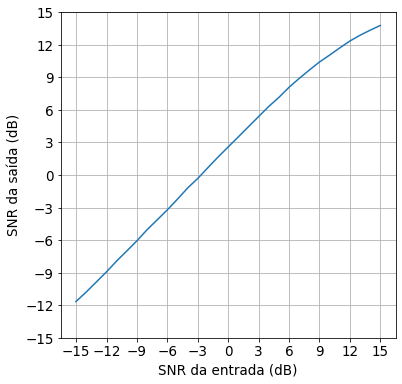

In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import statsmodels.tsa.stattools as st
from numpy.linalg import matrix_power, inv, pinv
from scipy import stats
from scipy.fft import fft, ifft, fftfreq
import pysepm
def db(x):
    return 10*np.log10(np.absolute(x))

SNR = np.arange(-15,16,1)
SNR_i = np.zeros((len(SNR)))
SNR_f = np.zeros((len(SNR)))
fs, audio = wavfile.read("fala original.WAV")

for s in range(len(SNR)):
    #Processamento do áudio e adição do ruído
    power = audio**2
    power_avg_db = db(np.mean(power))
    noise_db = power_avg_db - SNR[s]
    noise_watt = 10**(noise_db/10)
    noise = np.random.normal(0, np.sqrt(noise_watt), len(audio))
    audio_noise = audio + noise
    ruido_power = (audio[:33075] - audio_noise[:33075])**2
    ruido_db = 10*np.log10(np.mean(ruido_power))
    SNR_i[s] = power_avg_db - ruido_db
    print('SNR inicial = ', SNR_i[s])

    #Matriz de Transição
    p = 5
    y = audio_noise
    Ry = np.zeros((p,p))
    ryy = np.zeros((2*p+1,1))
    for i in range(2*p+1):            
        aux = np.zeros(y.shape)
        aux[:len(y)-i] = y[i:]
        ryy[i][0] = np.mean(aux*y)
    for i in range(p):
        Ry[i,:] = ryy[i+1:i+p+1,0]    
    a = np.matmul(np.linalg.inv(Ry),ryy[1+p:,:])
    A = np.zeros((p,p))
    A[:p-1,1:] = np.identity(p-1)
    A[p-1,:] = a[:,0]
    w, z = np.linalg.eig(A)

    #Filtro de Kalman iterativo
    xnn_1 = np.zeros((p,1))
    xn1n = np.zeros((p,1))
    e = np.zeros((len(y)))
    H = np.zeros((1,p))
    H[0][p-1] = 1
    K = np.zeros((p,1))
    I = np.identity(p)
    for k in range(10):
        for n in range(1,len(y)):
            e[n] = y[n] - np.dot(H,xnn_1)
            xnn = xnn_1 + K*e[n]
            xn1n = np.dot(A, xnn)
            xnn_1 = xn1n
        ree = np.zeros((p+1,1))
        for i in range(p+1):    
            aux = np.zeros(e.shape)
            aux[:len(e)- i] = e[i:]
            ree[i][0] = np.mean(aux*e)
        M = np.zeros((p,p))
        for i in range(p):
            M[i,:] = np.dot(H,np.dot(matrix_power(np.dot(A,(I - np.dot(K,H))),i),A))    
        aux = np.zeros((p,1))
        aux[:,0] = ree[1:,0]
        K = K + np.dot(inv(M),aux)/ree[0][0]

    s_hat = np.zeros((len(y)))
    xnn_1 = np.zeros((p,1))
    for n in range(1,len(y)):
        e[n] = y[n] - np.dot(H,xnn_1)
        xnn = xnn_1 + K*e[n]
        s_hat[n] = np.dot(H,xnn)
        xn1n = np.dot(A, xnn)
        xnn_1 = xn1n
    k =  s_hat[:33075] - audio[:33075]
    ruido_power = (k)**2
    ruido_db = 10*np.log10(np.mean(ruido_power))
    SNR_f[s] = power_avg_db - ruido_db
    print('SNR final = ', SNR_f[s], '\n')
    
plt.rcParams.update({'font.size': 13.5})
plt.figure(figsize=(6,6))
plt.plot(SNR_i, SNR_f)
plt.xticks(np.arange(-15,16,3))
plt.yticks(np.arange(-15,16,3))
plt.xlabel('SNR da entrada (dB)')
plt.ylabel('SNR da saída (dB)')
plt.grid(True)

## y = s_hat

SNR inicial =  -0.04237838055356491
SNR final =  2.554329844335445 

SNR inicial =  2.554329844335445
SNR final =  1.7336393652291662 

SNR inicial =  1.7336393652291662
SNR final =  2.0199064164757417 

SNR inicial =  2.0199064164757417
SNR final =  1.9437399072734074 

SNR inicial =  1.9437399072734074
SNR final =  1.9657876989792875 

SNR inicial =  1.9657876989792875
SNR final =  1.9595528058998823 

SNR inicial =  1.9595528058998823
SNR final =  1.9613277970965193 

SNR inicial =  1.9613277970965193
SNR final =  1.960823438016046 

SNR inicial =  1.960823438016046
SNR final =  1.9609668276438654 

SNR inicial =  1.9609668276438654
SNR final =  1.960926068124941 



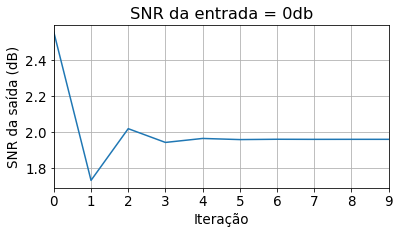

In [3]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import statsmodels.tsa.stattools as st
from numpy.linalg import matrix_power, inv, pinv
from scipy import stats
from scipy.fft import fft, ifft, fftfreq
import pysepm
def db(x):
    return 10*np.log10(np.absolute(x))

#Processamento do áudio e adição do ruído
fs, audio = wavfile.read("fala original.WAV")
power = audio**2
power_avg_db = db(np.mean(power))
SNR = 0
noise_db = power_avg_db - SNR
noise_watt = 10**(noise_db/10)
noise = np.random.normal(0, np.sqrt(noise_watt), len(audio))
audio_noise = audio + noise
wavfile.write("fala ruido.WAV", fs, audio_noise.astype(np.int16))
ruido_power = (audio[:33075] - audio_noise[:33075])**2
ruido_db = 10*np.log10(np.mean(ruido_power))
SNR = power_avg_db - ruido_db
s_hat = audio_noise
SNR_f = np.zeros((10))

for j in range(len(SNR_f)):
    #Matriz de Transição
    ruido_power = (audio[:33075] - s_hat[:33075])**2
    ruido_db = 10*np.log10(np.mean(ruido_power))
    SNR = power_avg_db - ruido_db
    print('SNR inicial = ', SNR)
    p = 5
    y = s_hat
    Ry = np.zeros((p,p))
    ryy = np.zeros((2*p+1,1))
    for i in range(2*p+1):            
        aux = np.zeros(y.shape)
        aux[:len(y)-i] = y[i:]
        ryy[i][0] = np.mean(aux*y)
    for i in range(p):
        Ry[i,:] = ryy[i+1:i+p+1,0]    
    a = np.matmul(np.linalg.inv(Ry),ryy[1+p:,:])
    A = np.zeros((p,p))
    A[:p-1,1:] = np.identity(p-1)
    A[p-1,:] = a[:,0]
    w, z = np.linalg.eig(A)

    #Filtro de Kalman iterativo
    xnn_1 = np.zeros((p,1))
    xn1n = np.zeros((p,1))
    e = np.zeros((len(y)))
    H = np.zeros((1,p))
    H[0][p-1] = 1
    K = np.zeros((p,1))
    I = np.identity(p)
    for k in range(10):
        for n in range(1,len(y)):
            e[n] = y[n] - np.dot(H,xnn_1)
            xnn = xnn_1 + K*e[n]
            xn1n = np.dot(A, xnn)
            xnn_1 = xn1n
        ree = np.zeros((p+1,1))
        for i in range(p+1):    
            aux = np.zeros(e.shape)
            aux[:len(e)- i] = e[i:]
            ree[i][0] = np.mean(aux*e)
        M = np.zeros((p,p))
        for i in range(p):
            M[i,:] = np.dot(H,np.dot(matrix_power(np.dot(A,(I - np.dot(K,H))),i),A))    
        aux = np.zeros((p,1))
        aux[:,0] = ree[1:,0]
        K = K + np.dot(inv(M),aux)/ree[0][0]
    
    s_hat = np.zeros((len(y)))
    xnn_1 = np.zeros((p,1))
    for n in range(1,len(y)):
        e[n] = y[n] - np.dot(H,xnn_1)
        xnn = xnn_1 + K*e[n]
        s_hat[n] = np.dot(H,xnn)
        xn1n = np.dot(A, xnn)
        xnn_1 = xn1n
    
    k =  s_hat[:33075] - audio[:33075]
    ruido_power = (k)**2
    ruido_db = 10*np.log10(np.mean(ruido_power))
    SNR_f[j] = power_avg_db - ruido_db
    print('SNR final = ', SNR_f[j], '\n')
    
plt.figure(figsize=(6,3))
plt.plot(SNR_f)
plt.xticks(np.arange(0,11))
plt.xlabel('Iteração')
plt.ylabel('SNR da saída (dB)')
plt.xlim(0,9)
plt.title('SNR da entrada = 0db')
plt.grid(True)